# Predicting Terrorist Attacks
## Exploratory Data Analysis

**Author:** Thomas Skowronek

**Date:** March 23, 2018

### Notebook Configuration

In [122]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Configure notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display up to 150 rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

### Load the Datasets
Load the dataset created by the preprocessing notebook.

In [124]:
# Load the preprocessed GTD dataset
gtd_df = pd.read_csv('../data/gtd_preprocessed_95t016.csv', low_memory=False, index_col = 0,
                      na_values=[''])

### Inspect the Structure
The cleansed data frame contains 48 attributes, one of which is used for the data frame index, and 112,251 observations.

In [125]:
# Display a summary of the data frame
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112251 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               112251 non-null int64
imonth              112251 non-null int64
iday                112251 non-null int64
country_txt         112251 non-null object
region_txt          112251 non-null object
provstate           112251 non-null object
city                112251 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         112251 non-null float64
summary             112251 non-null object
attacktype1_txt     112251 non-null object
targtype1_txt       112251 non-null object
targsubtype1_txt    112251 non-null object
corp1               112251 non-null object
target1             112251 non-null object
natlty1_txt         112251 non-null object
gname               112251 non-null object
nperpcap            98849 non-null float64
weaptype1_txt       112251 non-null object
weapsubtype1

### Code Book
Python interprets the data types differently than the code book provided by START.

|ATTRIBUTE|PYTHON DTYPE|CODE BOOK TYPE|DEFINITION|
|:----------------|:--------|:------------|:---------------------------------------|
|eventid|int64|Numeric|12-digit Event ID system. First 8 numbers - date recorded "yyyymmdd". Last 4 numbers - sequential case number for the given day|
|iyear|int64|Numeric|The year in which the incident occurred|
|imonth|int64|Numeric|The month in which the incident occurred.  When the exact month of the incident is unknown, this will be recorded as "0".|
|iday|int64|Numeric|The numeric day of the month on which the incident occurred.  When the exact day of the incident is unknown, the field is recorded as "0".|
|extended|object|Categorical|The duration of an incident extended more than 24 hours.  1 = YES, 0 = NO|
|country_txt|object|Categorical|Identifies the country or location where the incident occurred.  When incident occurred cannot be identified, it is coded as "Unknown.|
|region_txt|object|Categorical|Identifies the region in which the incident occurred, and divided into 1 of 12 categories|
|provstate|object|Text|The name (at the time of event) of the 1st order subnational administrative region in which the event occurs|
|city|object|Text|The name of the city, village, or town in which the incident occurred.  If unknown, then this field contains the smallest administrative area below provstate|
|latitude|float64|Numeric|The latitude (based on WGS1984 standards) of the city in which the event occurred|
|longitude|float64|Numeric|The longitude (based on WGS1984 standards) of the city in which the event occurred.|
|specificity|float64|Categorical|Identifies the geospatial resolution of the latitude and longitude fields. 1 to 5|
|vicinity|object|Categorical|1 = YES, The incident occurred in the immediate vicinity of the city in question.  0 = NO, The incident in the city itself.|
|summary|object|Text|A brief narrative summary of the incident, noting the "when, where, who, what, how, and why.|
|crit1|object|Categorical|The violent act must be aimed at attaining a political, economic, religious, or social goal. 1 = YES, 0 = NO|
|crit2|object|Categorical|There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience than the immediate victims. 1 = YES, 0 = NO|
|crit3|object|Categorical|The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants.  1 = YES, 0 = NO|
|doubtterr|object|Categorical|There is doubt as to whether the incident is an act of terrorism.  1 = YES, 0 = NO|
|multiple|object|Categorical|Denote that the particular attack was part of a "multiple" incident.  1 = YES, 0 = NO|
|success|object|Categorical|A successful attack depends on the type of attack. The key question is whether or not the attack type took place.  1 = YES, 0 = NO|
|suicide|object|Categorical|Coded "Yes" in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 1 = YES, 0 = NO|
|attacktype1_txt|object|Categorical|The general method of attack and often reflects the broad class of tactics used. 9 categories|
|targtype1_txt|object|Categorical|The general type of target/victim.  22 categories|
|targsubtype1_txt|object|Categorical|The more specific target category and provides the next level of designation for each target type. If a target subtype is not applicable this variable is left blank|
|corp1|object|Text|The corporate entity or government agency that was targeted|
|target1|object|Text|The specific person, building, installation, etc., that was targeted and/or victimized|
|natlty1_txt|object|Categorical|The nationality of the target that was attacked.  For hijacking incidents, the nationality of the plane is recorded|
|gname|object|Text|The name of the group that carried out the attack|
|guncertain1|object|Categorical|Indicates whether or not the information reported about the Perpetrator Group Name(s) is based on speculation or dubious claims of responsibility.  1 = YES, 0 = NO|
|individual|object|Categorical|Indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 1 = YES, 0 = NO|
|nperpcap|float64|Numeric|The number of perpetrators taken into custody. "-99" or "Unknown" appears when there is evidence of captured, but the number is not reported|
|claimed|object|Categorical|Indicates whether a group or person(s) claimed responsibility for the attack.  1 = YES, 0 = NO|
|weaptype1_txt|object|Categorical|Records the general type of weapon used in the incident.  Up to four weapon types are recorded for each incident|
|weapsubtype1_txt|object|Categorical|A more specific value for most of the Weapon Types identified|
|nkill|float64|Numeric|Total confirmed fatalities for the incident|
|nkillus|float64|Numeric|The number of U.S. citizens who died as a result of the incident|
|nkillter|float64|Numeric|Limited to only perpetrator fatalities|
|nwound|float64|Numeric|The number of confirmed non-fatal injuries to both perpetrators and victims|
|nwoundus|float64|Numeric|The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims|
|nwoundte|float64|Numeric|Number of Perpetrators Injured|
|property|object|Categorical|There is evidence of property damage from the incident.  1 = YES, 0 = NO|
|ishostkid|object|Categorical|Whether or not the victims were taken hostage or kidnapped during an incident. 1 = YES, 0 = NO|
|scite1|object|Text|Cites the first source that was used to compile information on the specific incident|
|dbsource|object|Text|Identifies the original data collection effort in which each event was recorded|
|INT_LOG|object|Categorical|It indicates whether a perpetrator group crossed a border to carry out an attack (logistically international).  1 = YES, 0 = NO, -9=UNKNOWN|
|INT_IDEO|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (ideologically international). 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_MISC|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (not clear if logistically or ideologically international) 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_ANY|object|Categorical|The attack was international on any of the dimensions.  1 = YES, 0 = NO, -9=UNKNOWN|


**NOTE 1:** *For categorical variables, -9 was replaced with -1 per a recommendation from Dr. George at Regis University.*

**NOTE 2:** *For attributes containing 1, 0, and -1, they were replaced with a labeled version of the attribute and can be identified by a `_txt` suffix in the data frame.*

### Convert Attributes to Categorical
Convert a subset of the data frame attributes to categorical to align with the GTD code book. Converting attributes to categorical reduces memory requirements and notifies other libraries to treat the attribute accordingly (Pandas, n.d.).  For the GTD data frame, it results in a percent decrease of 36.5%.

In [126]:
# List of attributes that are categorical
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt', 
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt', 
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt', 
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')
    
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112251 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               112251 non-null int64
imonth              112251 non-null int64
iday                112251 non-null int64
country_txt         112251 non-null category
region_txt          112251 non-null category
provstate           112251 non-null object
city                112251 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         112251 non-null category
summary             112251 non-null object
attacktype1_txt     112251 non-null category
targtype1_txt       112251 non-null category
targsubtype1_txt    112251 non-null category
corp1               112251 non-null object
target1             112251 non-null object
natlty1_txt         112251 non-null category
gname               112251 non-null object
nperpcap            98849 non-null float64
weaptype1_txt       112251 non-null catego

### Summary Statistics
Each of the numeric attributes contain missing values ranging between 3.36% and 11.92%.  The following table depicts the summary statistics prior to imputation.

In [127]:
gtd_df[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
        'nwoundus', 'nwoundte']].dropna().describe(
    percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nperpcap,90348.0,0.117900,1.910558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.0,406.0
nkill,90348.0,1.928288,6.840954,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,4.0,670.0,670.0
nkillus,90348.0,0.010404,0.284529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,44.0
nkillter,90348.0,0.303803,2.559151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,500.0
nwound,90348.0,3.435162,13.542081,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,8.0,1500.0,1500.0
nwoundus,90348.0,0.013614,0.658389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0
nwoundte,90348.0,0.103898,1.522910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0


### Imputation
A threshold of greater than three standard deviations is used to identify attributes with outliers.  Since the mean is not robust and is affected by outliers, the median is recommended for imputation (Chen, n.d.).  The following function imputes the median if an attribute contains outliers, otherwise the attribute mean is imputed. 

In [128]:
# Function to impute either the median or mean
def fill_value(attr):
    fill = 0.0
    threshold = 3
    attr_clean = attr.dropna()
    attr_std = attr_clean.std()
    outliers = attr_clean[attr_clean > (threshold * attr_std)]
    
    if (outliers.count() > 0):
        fill = attr_clean.median()
    else:
        fill = attr_clean.mean()
    
    return fill

In [129]:
# Impute each of the numeric attributes that contain missing values
gtd_df['nperpcap'] = gtd_df['nperpcap'].fillna(fill_value(gtd_df['nperpcap']))
gtd_df['nkill'] = gtd_df['nkill'].fillna(fill_value(gtd_df['nkill']))
gtd_df['nkillus'] = gtd_df['nkillus'].fillna(fill_value(gtd_df['nkillus']))
gtd_df['nkillter'] = gtd_df['nkillter'].fillna(fill_value(gtd_df['nkillter']))
gtd_df['nwound'] = gtd_df['nwound'].fillna(fill_value(gtd_df['nwound']))
gtd_df['nwoundus'] = gtd_df['nwoundus'].fillna(fill_value(gtd_df['nwoundus']))
gtd_df['nwoundte'] = gtd_df['nwoundte'].fillna(fill_value(gtd_df['nwoundte']))

### Summary Statistics with Imputation
The following table presents the summary statistics after imputation.

In [130]:
gtd_df[['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 
        'nwoundus', 'nwoundte']].describe(
    percentiles=[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nperpcap,112251.0,0.111108,2.055072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.0,406.0
nkill,112251.0,2.485938,11.820567,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,5.0,1500.0,1500.0
nkillus,112251.0,0.039109,5.723184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1358.0,1358.0
nkillter,112251.0,0.428121,4.004935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,500.0
nwound,112251.0,3.636662,40.069053,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,8.0,7366.0,7366.0
nwoundus,112251.0,0.023750,2.127698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0,650.0
nwoundte,112251.0,0.086538,1.378122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0


### Data Frame Review
The new data frame now has a state that only includes missing values for the latitude and longitude attributes.  There are 1,407 observations or 1.25% of the total observations, which contain missing values.

In [131]:
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112251 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               112251 non-null int64
imonth              112251 non-null int64
iday                112251 non-null int64
country_txt         112251 non-null category
region_txt          112251 non-null category
provstate           112251 non-null object
city                112251 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         112251 non-null category
summary             112251 non-null object
attacktype1_txt     112251 non-null category
targtype1_txt       112251 non-null category
targsubtype1_txt    112251 non-null category
corp1               112251 non-null object
target1             112251 non-null object
natlty1_txt         112251 non-null category
gname               112251 non-null object
nperpcap            112251 non-null float64
weaptype1_txt       112251 non-null categ

### Latitude and Longitude
Using the following calculations, 1,407 observations contain missing values for latitude and longitude.  Of the 1,407 observations, 984 observations contain UNKNOWN for the city attribute.  Given this information, using reverse gecoding based on the city would not be possible for 69.93% of the observations.  As a result, the observations will be dropped since they only represent 1.25% of the total dataset.

In [132]:
# Select the observations that contain null
ll_df = gtd_df[np.isnan(gtd_df.latitude)]
ll_df.shape

# Chech how many observations have city set to Unknown
city_df = ll_df[(ll_df['city'] == "UNKNOWN")]
city_df['city'].value_counts()

# Remove observations containing missing missing values for latitude and longitude
gtd_clean = gtd_df.dropna().copy()
gtd_clean.info(verbose = True)

(1407, 47)

UNKNOWN    984
Name: city, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110844 entries, 199501000001 to 201701270001
Data columns (total 47 columns):
iyear               110844 non-null int64
imonth              110844 non-null int64
iday                110844 non-null int64
country_txt         110844 non-null category
region_txt          110844 non-null category
provstate           110844 non-null object
city                110844 non-null object
latitude            110844 non-null float64
longitude           110844 non-null float64
specificity         110844 non-null category
summary             110844 non-null object
attacktype1_txt     110844 non-null category
targtype1_txt       110844 non-null category
targsubtype1_txt    110844 non-null category
corp1               110844 non-null object
target1             110844 non-null object
natlty1_txt         110844 non-null category
gname               110844 non-null object
nperpcap            110844 non-null float64
weaptype1_txt       110844 non-null categ

### Incident Date
Concatinate the `iyear`, `imonth` and `iday` attributes to create an incident date.

In [133]:
# 297 iday attributes contain 0 to represent unknown, setting 1
gtd_clean.loc[gtd_clean['iday'] == 0, 'iday'] = 1

gtd_clean['incident_date'] = (gtd_clean['iyear'].astype(str) + '-' + 
                              gtd_clean['imonth'].astype(str) + '-' + 
                              gtd_clean['iday'].astype(str))

gtd_clean['incident_date'] = pd.to_datetime(gtd_clean['incident_date'], 
                                            format="%Y-%m-%d")

### Save the Cleansed Data
Output the new data frame to a CSV file for use in the predictive models.

In [134]:
gtd_clean.to_csv("../data/gtd_eda_95t016.csv", sep = ",")

### Attacks by Year
Plot the number of terrorist incidents by year.

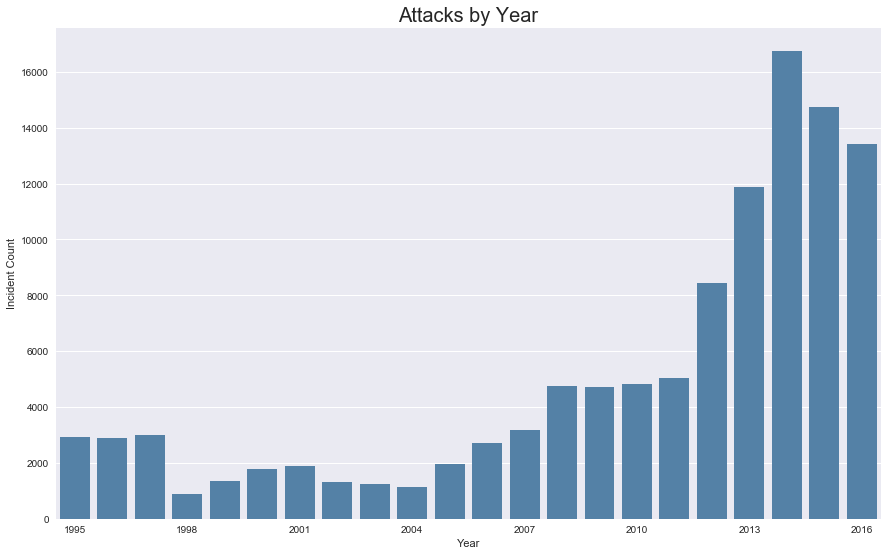

In [135]:
# Make a range of years to show categories with no observations
years = np.arange(1995, 2017)

# Draw a count plot to show the number of attacks each year
plt1 = sns.factorplot("iyear", data=gtd_clean, kind="count", color='steelblue', size=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Attacks by Year', fontsize=20)
_ = plt.xlabel('Year')
_ = plt.ylabel('Incident Count')
plt.show();

### Fatalities by Year
Plot the number of confirmed fatalities by year.

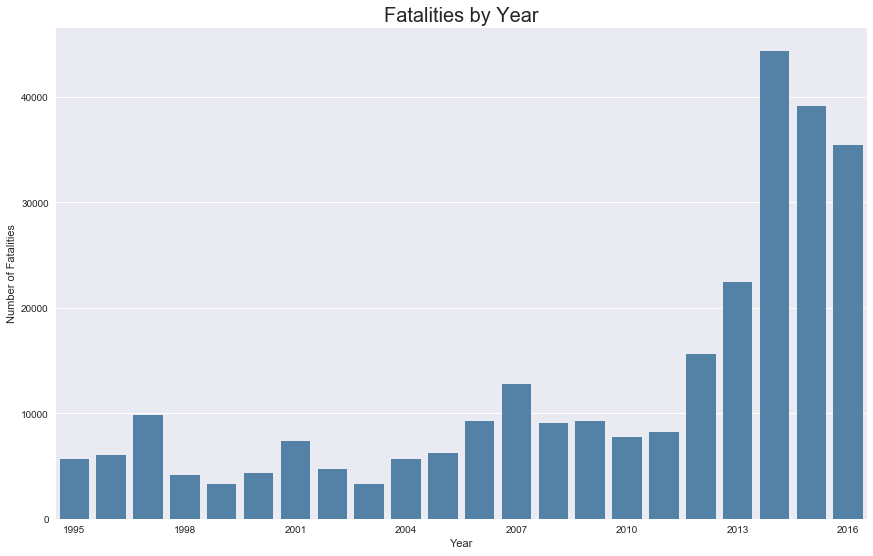

In [136]:
# Make a range of years to show categories with no observations
years = np.arange(1995, 2017)

df1 = gtd_clean[['iyear', 'nkill']]
gp1 = df1.groupby(['iyear'], as_index = False).sum()

# Draw a count plot to show the number of attacks each year
plt1 = sns.factorplot(x = 'iyear', y = 'nkill', data=gp1, kind = 'bar', color='steelblue', size=7.6, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Fatalities by Year', fontsize=20)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Fatalities')
plt.show();

### Attacks by Country
Plot illustrating the total number of attacks by country from 1995 to 2016.

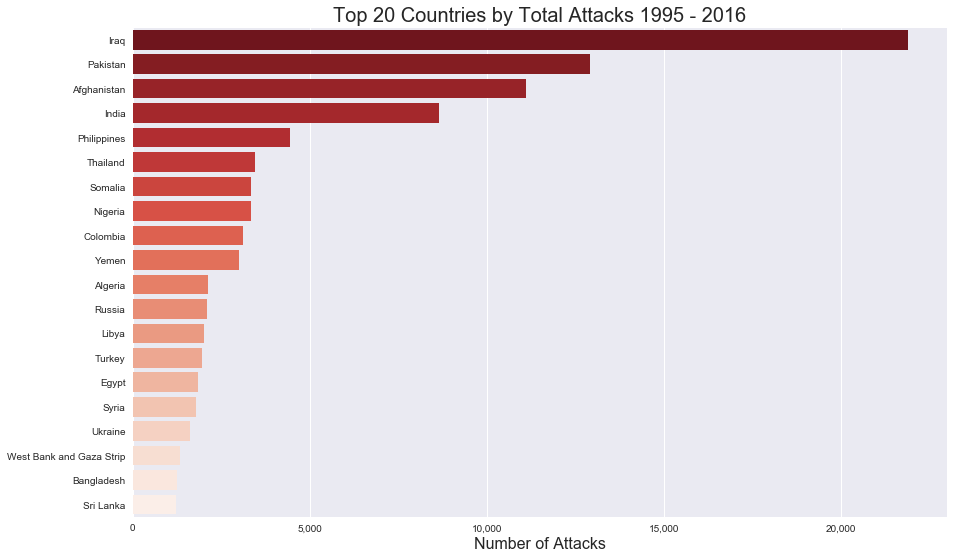

In [137]:
data = gtd_clean[['country_txt']].copy()
data['event_id'] = data.index

# Calculate the number of attacks
data = data.groupby(['country_txt']).agg(['count'])
data = data.reset_index()
data.columns = ['Country','Attacks']

# Order attacks descending
data = data.sort_values('Attacks', ascending=False)[0:20]
data = data.reset_index()

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(data))
colors.reverse()
plt.figure(figsize=(14.6, 9.0))

# Plot bar chart with index as x values
ax = sns.barplot(data.Attacks, data.index, orient='h', palette=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_yticklabels(data.Country)
ax.set_xlabel(xlabel='Number of Attacks', fontsize=16)
ax.set_title(label='Top 20 Countries by Total Attacks 1995 - 2016', fontsize=20)
plt.show();

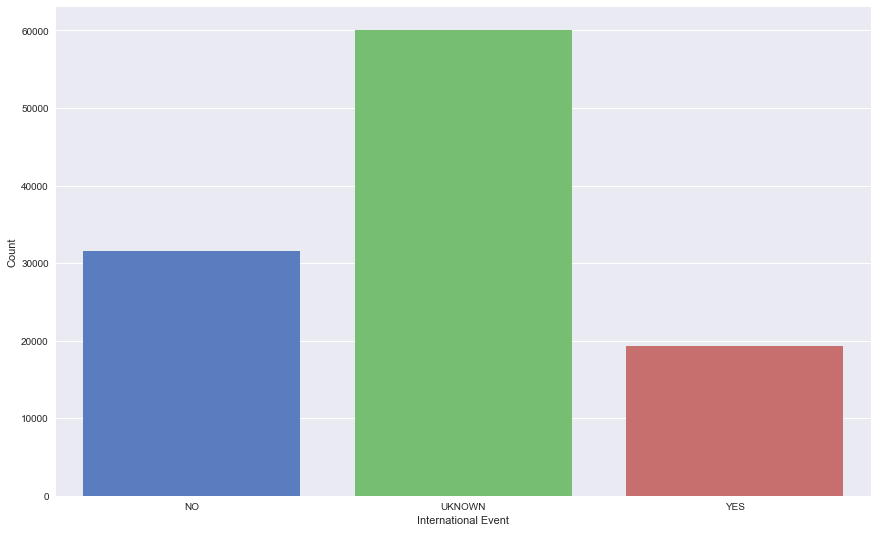

In [138]:
_ = sns.countplot(x = 'INT_ANY_txt', data=gtd_clean)
_ = plt.xlabel('International Event')
_ = plt.ylabel('Count')
plt.show();

### References

Chen, D. (n.d.). Duplicate and missing data Retrieved from https://campus.datacamp.com/courses/cleaning-data-in-python/cleaning-data-for-analysis?ex=11

Pandas. (n.d.). Categorical data. Retrieved from https://pandas.pydata.org/pandas-docs/stable/categorical.html